In [30]:
import pandas as pd
import get_uptodate_binance_data
from binance.client import Client
import matplotlib.pyplot as plt
from statistics import mean


In [8]:
def get_df_binance(symbol, timeframe='1d', starting='13 Oct 2021', ending='13 Dec 2021'):
    df, filename = get_uptodate_binance_data.get_all_binance(symbol=symbol, kline_size=timeframe, start=starting, end=ending, save=False)
    #df = compute_pnl.preparing_df(filename, timeframe)
    return df

In [5]:
df = pd.DataFrame()
df['date']=['16 Aug 2020', '13 Sep 2020', '14 Dec 2020', '8 Feb 2021', '23 Feb 2021', '8 May 2021', '10 Aug 2021']
df['selected_crypto']=['REN/USDT', 'YFI/USDT', 'INJ/USDT', 'RUNE/USDT', 'TORN/USDT', 'LUNA/USDT', 'MATIC/USDT']
df

In [6]:
df

,date,selected_crypto
0,16 Aug 2020,REN/USDT
1,13 Sep 2020,YFI/USDT
2,14 Dec 2020,INJ/USDT
3,8 Feb 2021,RUNE/USDT
4,23 Feb 2021,TORN/USDT
5,8 May 2021,LUNA/USDT
6,10 Aug 2021,MATIC/USDT


In [19]:
pnl = [1000]

for i in range(0, len(df)):
    crypto_of_choice = df.iloc[i].selected_crypto
    date_of_buy = df.iloc[i].date
    historical_prices = get_df_binance(crypto_of_choice, '1d', date_of_buy, date_of_buy)
    if not historical_prices.empty:
        pnl.append(pnl[-1]/historical_prices.open.values[0]*historical_prices.close.values[0])

print(pnl)

[1000, 1205.986181094047, 1028.5461899883646, 1282.4897605416347, 1554.5925110237956, 1596.4993263708257, 1638.8123845387167]


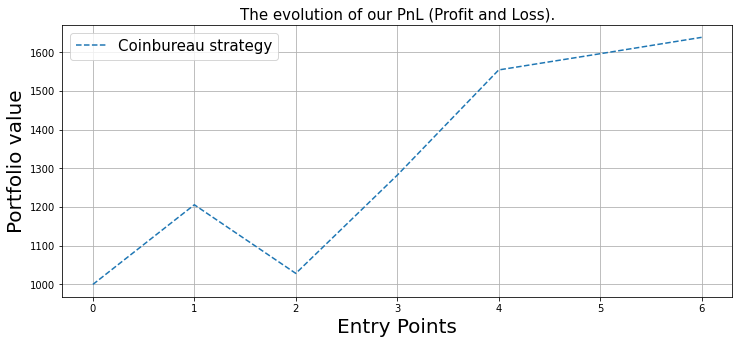

In [33]:
plt.figure(figsize=(12, 5))
plt.plot(pnl,label = "Coinbureau strategy", linestyle="--")
plt.xlabel('Entry Points',fontsize=20)
plt.ylabel('Portfolio value',fontsize=20)
plt.title('The evolution of our PnL (Profit and Loss).',fontsize=15)
plt.legend( prop={'size': 15})
plt.grid()

plt.savefig('coinbureau.png')
plt.show()

len(non_zero_pct_change) : 6
avg_ups_power 0.14370196736242177
avg_down_power -0.14713269014800176
avg_order_return 0.09522952444401786
len(ups) 5
len(downs) 1
ration 0.833333


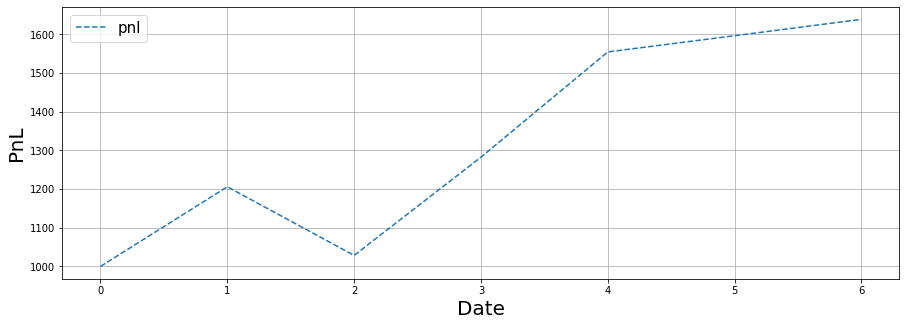

In [31]:
ups = []
downs = []
no_move = []
pct_change = []
for i in range(1, len(pnl)):
    pct_change.append((pnl[i]-pnl[i-1])/pnl[i-1])

for elem in pct_change:
    if elem > 0:
        ups.append(elem)
    elif elem < 0:
        downs.append(elem)
    else: 
        no_move.append(elem)



non_zero_pct_change = []
for elem in pct_change:
    if elem !=0:
        non_zero_pct_change.append(elem)

print('len(non_zero_pct_change) : %i' %len(non_zero_pct_change))

avg_ups_power = mean(ups)
avg_down_power = mean(downs)
avg_order_return = mean(non_zero_pct_change)

print('avg_ups_power', avg_ups_power)
print('avg_down_power', avg_down_power)
print('avg_order_return', avg_order_return)




print('len(ups) %i' %len(ups))
print('len(downs) %i' %len(downs))
print('ration %f' %(len(ups)/(len(ups)+len(downs))))
plt.figure(figsize=(15, 5))
#plt.plot(baseline,label = "buy-and-hold", linestyle=":")
plt.plot(pnl,label ='pnl', linestyle="--")
plt.xlabel('Date',fontsize=20)
plt.ylabel('PnL',fontsize=20)
plt.legend( prop={'size': 15})
plt.grid()
plt.show()